# IBM Quantum Hello world

https://docs.quantum-computing.ibm.com/start/hello-world

1.  Map the problem to a quantum-native format

2.  Optimize the circuits and operators

3.  Execute using a quantum primitive function

4.  Analyze the results


## Setup

In [1]:
import getpass
token = getpass.getpass("IBM token:")

In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account and set it as your default account.
service = QiskitRuntimeService()
if not service:
    QiskitRuntimeService.save_account(
        channel="ibm_quantum",
        token="",
        set_as_default=True)
    service = QiskitRuntimeService()
service

ModuleNotFoundError: No module named 'qiskit_ibm_runtime'

## Step 1. Map the problem to a quantum-native format


In [13]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw("mpl")

MissingOptionalLibraryError: ignored

See [`QuantumCircuit`](/api/qiskit/qiskit.circuit.QuantumCircuit#quantumcircuit) in the documentation for all available operations.


The following code cell uses the `quantum_info` package to create the two-qubit Pauli operator Z on qubit 1 and Z on qubit 2. If the state is entangled, then the correlation between qubit 1 and qubit 2 is one.


In [ ]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

## Step 2. Optimize the circuits and operators

For this example, the circuit the operators are simple, so no optimizations are needed.


## Step 3. Execute using a quantum primitive function

Quantum computers can produce random results, so you'll often want to collect a sample of the outputs by running the circuit many times. You can estimate the value of the observable using the `Estimator` class. `Estimator` is one of our two [primitives](../run/primitives-get-started); the other is `Sampler`, which can be used to get data from a quantum computer.


In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options

service = QiskitRuntimeService()

# Run on the least-busy backend you have access to
backend = service.least_busy(simulator=False, operational=True)

options = Options()
options.resilience_level = 1
options.optimization_level = 3

# Create an Estimator object
estimator = Estimator(backend, options=options)

# Submit the circuit to Estimator
job = estimator.run(circuits=[qc]*6, observables=[IZ, IX, ZI, XI, ZZ, XX], shots = 5000)

# Once the job is complete, get the result
job.result()

EstimatorResult(values=array([0.01795728, 0.03257367, 0.02751255, 0.01213789, 0.98291386,
       0.97229465]), metadata=[{'variance': 1.0931623420576193, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 1.092423762099776, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 1.0256330625131442, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 1.0262426744136923, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 0.16516750416031306, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 0.18593026938419716, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}])

<Admonition type="note" title="Queue times">
  Queue times on real devices may vary. If you would like to get a faster result, replace the `backend =` line with the following instead:

  ```python



  # Run on a simulator



  backend = service.get_backend("ibmq_qasm_simulator")



  ```
</Admonition>


The `values` property is a list of expectation values for each of the observables we provided.


## Step 4. Analyze the results


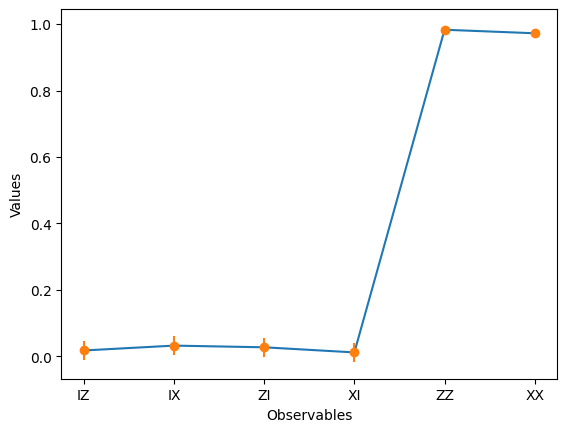

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# data
data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']
values = job.result().values

# creating error bars
error = []
for case in job.result().metadata:
    error.append(2*np.sqrt(case['variance']/case['shots']))

# plotting graph
plt.plot(data, values)
plt.errorbar(data, values, yerr = error, fmt ='o')
plt.xlabel('Observables')
plt.ylabel('Values')
plt.show()

Here we see that for qubits 0 and 1, the independent values of both X and Z are zero, while the correlations are one. This is a hallmark of quantum entanglement.


## Next steps

<Admonition type="tip" title="Recommendations">
  *   Learn how to [build circuits](../build/) in more detail.

  *   Try out some [tutorials.](https://learning.quantum-computing.ibm.com/catalog?content=tutorials)
</Admonition>
